# Problem Statement:
The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim is to build a predictive model and find out the sales of each product at a particular store.

Using this model, BigMart will try to understand the properties of products and stores which play a key role in increasing the sales of their products.

# Importing Required Libraries:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# Importing Dataset:

In [2]:
df=pd.read_csv("bigdatamart_Train.csv")
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


# EDA:

In [3]:
df.shape

(8523, 12)

In [4]:
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [5]:
df.nunique()

Item_Identifier              1559
Item_Weight                   415
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     3
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [7]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

<AxesSubplot:>

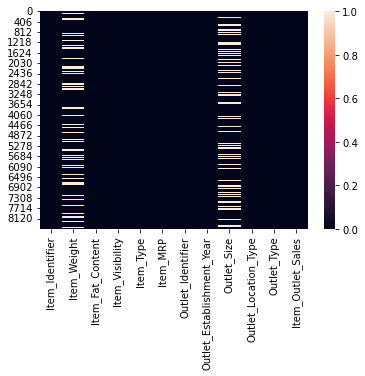

In [8]:
sns.heatmap(df.isnull())

In [9]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [10]:
df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

# Data Visualization:

<AxesSubplot:xlabel='Item_Fat_Content', ylabel='count'>

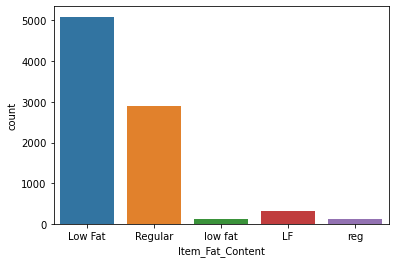

In [11]:
sns.countplot(df["Item_Fat_Content"])

In [12]:
df["Item_Fat_Content"]=df["Item_Fat_Content"].replace('low fat','Low Fat')
df["Item_Fat_Content"]=df["Item_Fat_Content"].replace('LF','Low Fat')
df["Item_Fat_Content"]=df["Item_Fat_Content"].replace('reg','Regular')

<AxesSubplot:xlabel='Item_Fat_Content', ylabel='count'>

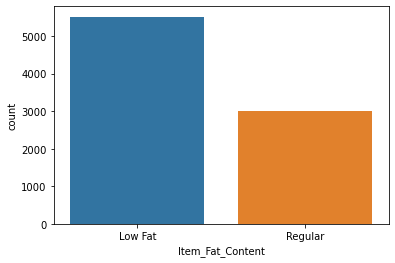

In [13]:
sns.countplot(df["Item_Fat_Content"])

Text(0.5, 1.0, 'Item_Type')

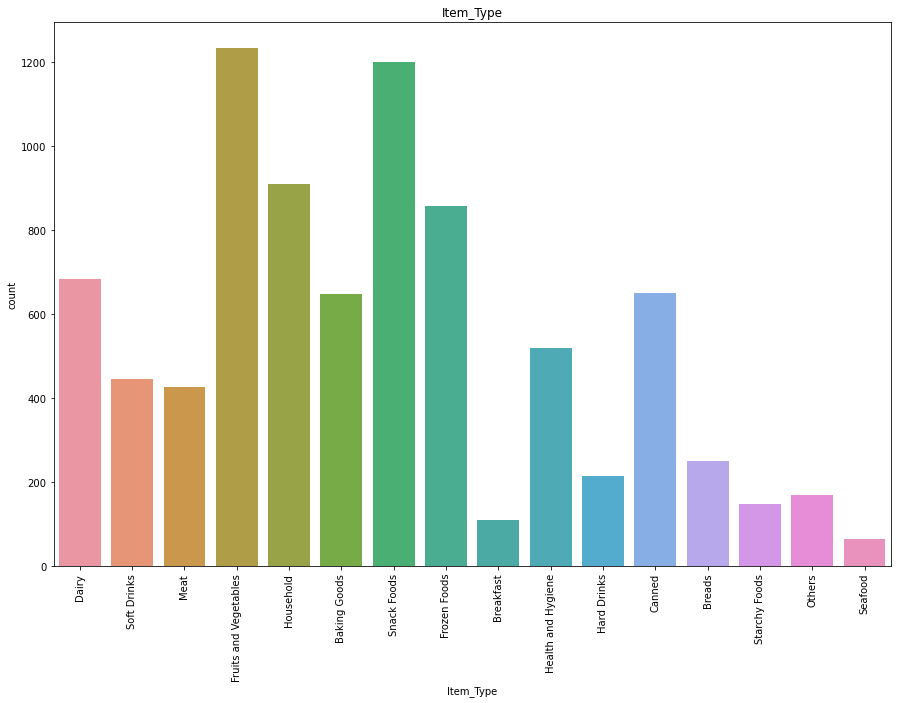

In [14]:
plt.figure(figsize=[15,10])
sns.countplot(df["Item_Type"])
plt.xticks(rotation=90)
plt.title("Item_Type")

<AxesSubplot:xlabel='Outlet_Size', ylabel='count'>

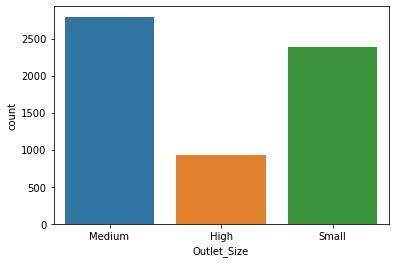

In [15]:
sns.countplot(df["Outlet_Size"])

<AxesSubplot:xlabel='Outlet_Location_Type', ylabel='count'>

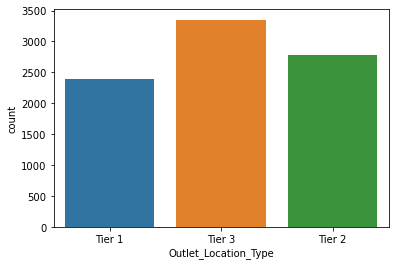

In [16]:
sns.countplot(df["Outlet_Location_Type"])

Text(0.5, 1.0, 'Outlet_Type')

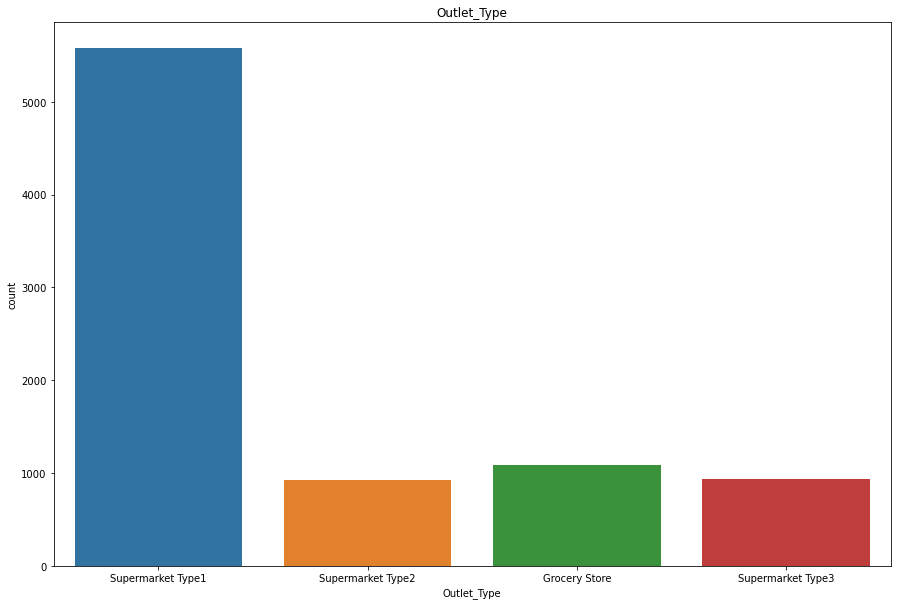

In [17]:
plt.figure(figsize=[15,10])
sns.countplot(df["Outlet_Type"])
plt.title("Outlet_Type")

<AxesSubplot:xlabel='Item_Outlet_Sales', ylabel='Density'>

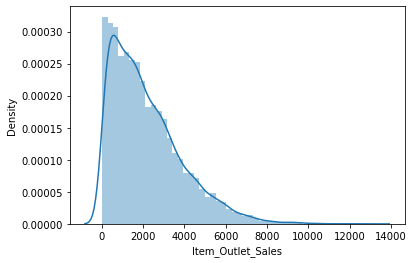

In [18]:
sns.distplot(df['Item_Outlet_Sales'])

<AxesSubplot:xlabel='Item_Weight', ylabel='Density'>

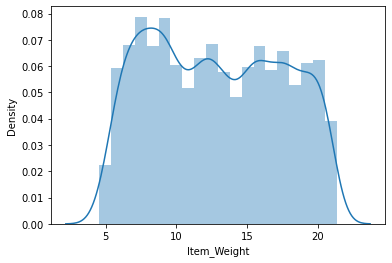

In [19]:
sns.distplot(df['Item_Weight'])

<AxesSubplot:xlabel='Item_Weight', ylabel='Outlet_Type'>

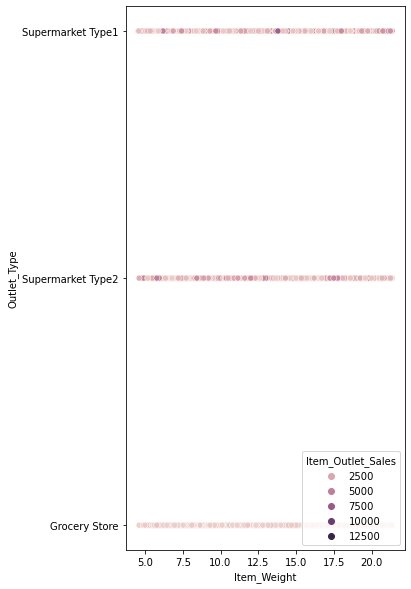

In [20]:
plt.figure(figsize=[5,10])
sns.scatterplot(x=df['Item_Weight'],y=df['Outlet_Type'], hue=df["Item_Outlet_Sales"], data=df)

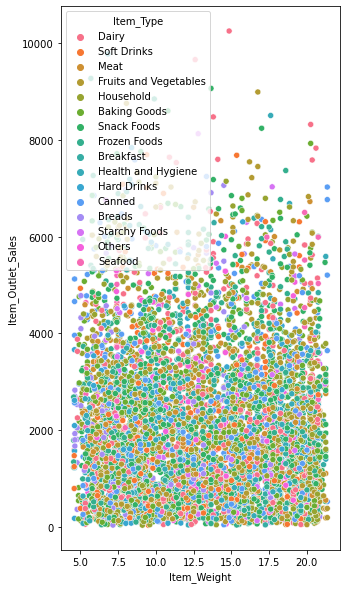

In [21]:
plt.figure(figsize=(5,10))
sns.scatterplot(x='Item_Weight',y='Item_Outlet_Sales', hue='Item_Type',data=df)
plt.show()

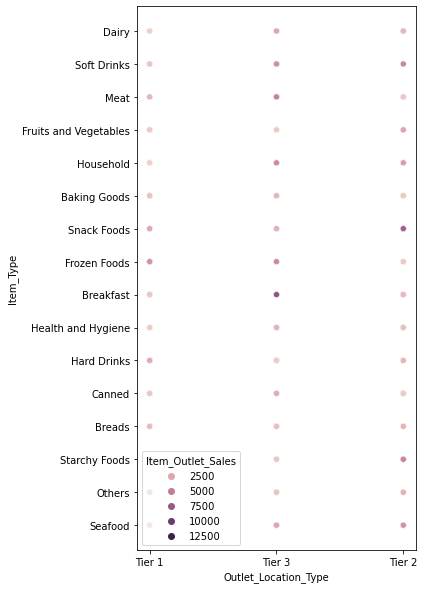

In [22]:
plt.figure(figsize=(5,10))
sns.scatterplot(x='Outlet_Location_Type', y='Item_Type', hue='Item_Outlet_Sales',  data=df)
plt.show()

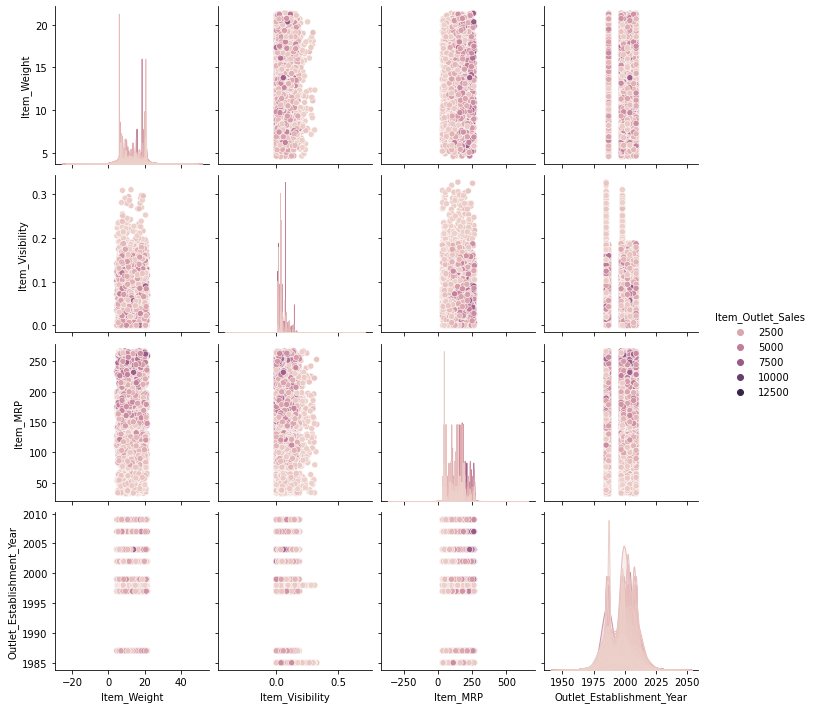

In [23]:
sns.pairplot(df,hue="Item_Outlet_Sales")

# Correlation:

In [24]:
df.corr()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.014048,0.027141,-0.011588,0.014123
Item_Visibility,-0.014048,1.000000,-0.001315,-0.074834,-0.128625
Item_MRP,0.027141,-0.001315,1.000000,0.005020,0.567574
Outlet_Establishment_Year,-0.011588,-0.074834,0.005020,1.000000,-0.049135
Item_Outlet_Sales,0.014123,-0.128625,0.567574,-0.049135,1.000000


<AxesSubplot:>

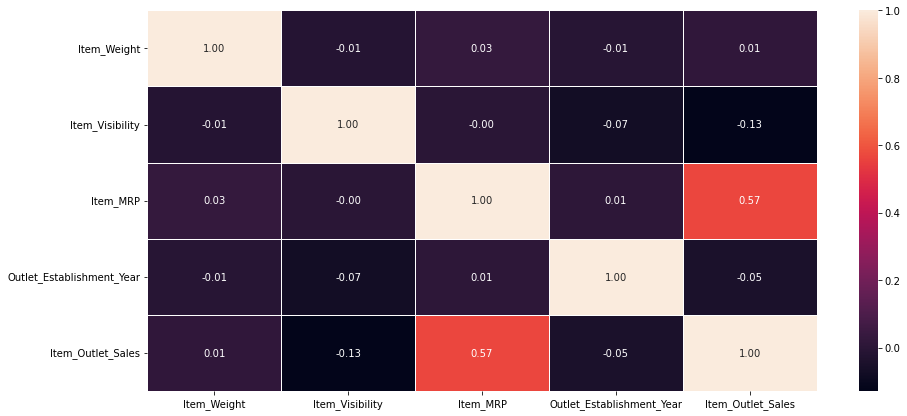

In [25]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,7))
sns.heatmap(df.corr(),annot=True,linewidth=0.5,fmt='.2f')

# Data Cleaning:

In [26]:
df["Item_Weight"].fillna(df["Item_Weight"].mean(),inplace=True)

In [27]:
from sklearn.impute import SimpleImputer
emb=SimpleImputer(strategy="most_frequent")
df['Outlet_Size']=emb.fit_transform(df['Outlet_Size'].values.reshape(-1, 1))

In [28]:
df.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

<AxesSubplot:>

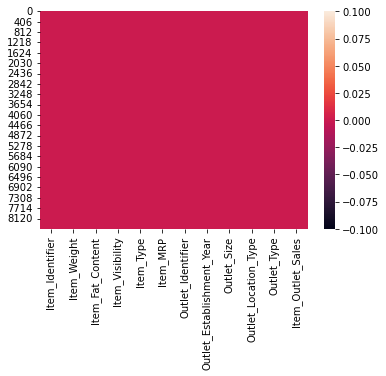

In [29]:
sns.heatmap(df.isnull())

# Checking Outliers:

<AxesSubplot:>

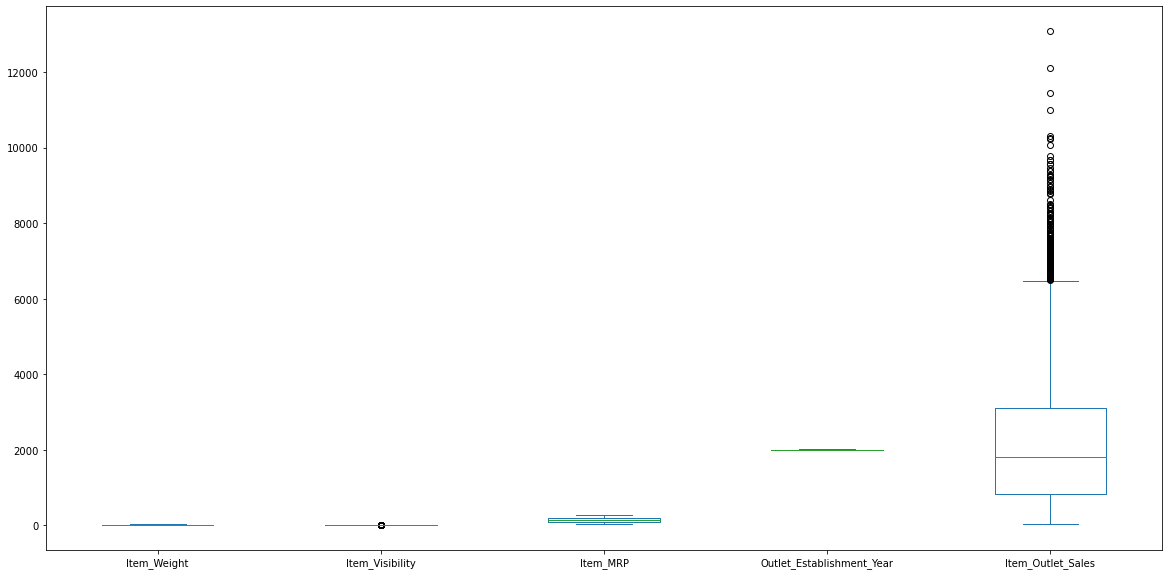

In [30]:
df.plot(kind='box',fontsize=10,figsize=(20,10))

Item_Visibility has outliers

# Removing Outliers:

In [31]:
col=df[["Item_Visibility"]]

In [32]:
from scipy.stats import zscore
z=np.abs(zscore(col))
df_new=df[(z<3).all(axis=1)]
df_new

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,Medium,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [33]:
df.shape

(8523, 12)

In [34]:
df_new.shape

(8428, 12)

# Percentage of Data Loss:

In [35]:
Data_loss = (8523-8428)/8523*100
Data_loss

1.1146309984747156

# Skewness:

In [36]:
df_new.skew()

Item_Weight                  0.089907
Item_Visibility              0.795956
Item_MRP                     0.128945
Outlet_Establishment_Year   -0.409186
Item_Outlet_Sales            1.173070
dtype: float64

In [37]:
sk=["Item_Visibility"]

In [38]:
from sklearn.preprocessing import PowerTransformer
Scaler=PowerTransformer(method='yeo-johnson')

In [39]:
df_new[sk] = Scaler.fit_transform(df_new[sk].values)

# Encoding the Data:

In [40]:
from sklearn.preprocessing import LabelEncoder as LE

In [41]:
cols=["Item_Identifier", "Item_Fat_Content", "Item_Type", "Outlet_Identifier", "Outlet_Size", "Outlet_Location_Type", "Outlet_Type"]

In [42]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
df_new[cols]=df_new[cols].apply(LE.fit_transform)

In [43]:
df_new

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.300,0,-1.142270,4,249.8092,9,1999,1,0,1,3735.1380
1,8,5.920,1,-1.032913,14,48.2692,3,2009,1,2,2,443.4228
2,662,17.500,0,-1.117874,10,141.6180,9,1999,1,0,1,2097.2700
3,1121,19.200,1,-1.734798,6,182.0950,0,1998,1,2,0,732.3800
4,1297,8.930,0,-1.734798,9,53.8614,1,1987,0,2,1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,370,6.865,0,0.033409,13,214.5218,1,1987,0,2,1,2778.3834
8519,897,8.380,1,-0.212619,0,108.1570,7,2002,1,1,1,549.2850
8520,1357,10.600,0,-0.537754,8,85.1224,6,2004,2,1,1,1193.1136
8521,681,7.210,1,1.538309,13,103.1332,3,2009,1,2,2,1845.5976


# Data Preprocessing:

In [44]:
x=df_new.drop("Item_Outlet_Sales",axis=1)
y=df_new["Item_Outlet_Sales"]

# Scaling:

In [45]:
from sklearn.preprocessing import MinMaxScaler
mms=MinMaxScaler()
x=pd.DataFrame(mms.fit_transform(x),columns=x.columns)
x

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,0.100128,0.282525,0.0,0.150584,0.266667,0.927507,1.000000,0.583333,0.5,0.0,0.333333
1,0.005135,0.081274,1.0,0.178376,0.933333,0.072068,0.333333,1.000000,0.5,1.0,0.666667
2,0.424904,0.770765,0.0,0.156784,0.666667,0.468288,1.000000,0.583333,0.5,0.0,0.333333
3,0.719512,0.871986,1.0,0.000000,0.400000,0.640093,0.000000,0.541667,0.5,1.0,0.000000
4,0.832478,0.260494,0.0,0.000000,0.600000,0.095805,0.111111,0.083333,0.0,1.0,0.333333
...,...,...,...,...,...,...,...,...,...,...,...
8423,0.237484,0.137541,0.0,0.449370,0.866667,0.777729,0.111111,0.083333,0.0,1.0,0.333333
8424,0.575738,0.227746,1.0,0.386845,0.000000,0.326263,0.777778,0.708333,0.5,0.5,0.333333
8425,0.870988,0.359929,0.0,0.304215,0.533333,0.228492,0.666667,0.791667,1.0,0.5,0.333333
8426,0.437099,0.158083,1.0,0.831823,0.866667,0.304939,0.333333,1.000000,0.5,1.0,0.666667


# Finding Best Random State:

In [46]:
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [47]:
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30, random_state=i)
    mod = LinearRegression()
    mod.fit(x_train, y_train)
    pred = mod.predict(x_test)
    acc=r2_score(y_test, pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Maximum r2 score is ",maxAccu," on Random_state ",maxRS)

Maximum r2 score is  0.5381362801658555  on Random_state  115


In [48]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=10,test_size=.20)

# Random Forest Regressor:

In [49]:
RFR=RandomForestRegressor()
RFR.fit(x_train,y_train)
pred=RFR.predict(x_test)
acc=r2_score(y_test,pred)
print('R2_Score:',r2_score(y_test,pred))
print('MAE:',mean_absolute_error(y_test,pred))
print('MSE:',mean_squared_error(y_test,pred))

R2_Score: 0.5143656135804113
MAE: 806.2936764282325
MSE: 1344854.8881361205


# Decision Tree Regressor:

In [50]:
DTR=RandomForestRegressor()
DTR.fit(x_train,y_train)
pred=DTR.predict(x_test)
acc=r2_score(y_test,pred)
print('R2_Score:',r2_score(y_test,pred))
print('MAE:',mean_absolute_error(y_test, pred))
print('MSE:',mean_squared_error(y_test, pred))

R2_Score: 0.5150381654103349
MAE: 806.0508963677343
MSE: 1342992.4075513622


# KNeighbors Regressor:

In [51]:
KN=KNeighborsRegressor()
KN.fit(x_train,y_train)
pred=KN.predict(x_test)
acc=r2_score(y_test,pred)
print('R2_Score:',r2_score(y_test,pred))
print('MAE:',mean_absolute_error(y_test,pred))
print('MSE:',mean_squared_error(y_test,pred))

R2_Score: 0.4766262492643205
MAE: 857.9847101067614
MSE: 1449365.5447019287


# Linear Regression:

In [52]:
LR = LinearRegression()
LR.fit(x_train,y_train)
predLR=LR.predict(x_test)
print('R2_score:',r2_score(y_test,predLR))
print('MAE:',mean_absolute_error(y_test, predLR))
print('MSE:',mean_squared_error(y_test, predLR))

R2_score: 0.4866139030899653
MAE: 889.8824517269804
MSE: 1421706.9903572518


# Cross Validation Score:

In [53]:
from sklearn.model_selection import cross_val_score
for i in range(2,8):
    cr=cross_val_score(DTR,x,y,cv=i)
    cr_mean=cr.mean()
    print("at cv= ", i)
    print('cross val score = ',cr_mean*100)

at cv=  2
cross val score =  54.19363042778231
at cv=  3
cross val score =  54.398176534737516
at cv=  4
cross val score =  54.59143956064088
at cv=  5
cross val score =  54.496932001237596
at cv=  6
cross val score =  55.051423238538774
at cv=  7
cross val score =  54.92845349600154


In [54]:
print(cross_val_score(RFR,x,y,cv=6).mean())

0.5503598026155897


In [55]:
print(cross_val_score(DTR,x,y,cv=6).mean())

0.549627812362444


In [56]:
print(cross_val_score(KN,x,y,cv=6).mean())

0.5033899018810636


In [57]:
print(cross_val_score(LR,x,y,cv=6).mean())

0.5045326097691915


# Saving:

In [58]:
import joblib
joblib.dump(RFR,"Big_Data_Mart_Sales.pkl")

['Big_Data_Mart_Sales.pkl']

# Now Let's Import Test Dataset:

In [59]:
df_test=pd.read_csv("bigdatamart_test.csv")
df_test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [60]:
df_test.shape

(5681, 11)

In [61]:
df_test.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
dtype: object

In [62]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                4705 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                4075 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


In [63]:
df_test.nunique()

Item_Identifier              1543
Item_Weight                   410
Item_Fat_Content                5
Item_Visibility              5277
Item_Type                      16
Item_MRP                     4402
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     3
Outlet_Location_Type            3
Outlet_Type                     4
dtype: int64

In [64]:
df_test.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

<AxesSubplot:>

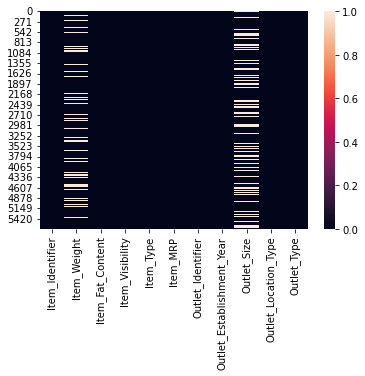

In [65]:
sns.heatmap(df_test.isnull())

# Data Visualization:

<AxesSubplot:xlabel='Item_Fat_Content', ylabel='count'>

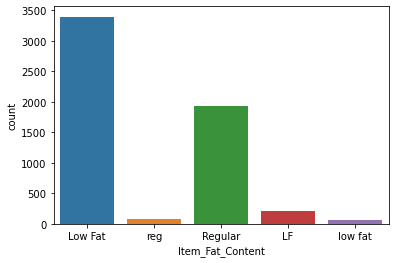

In [66]:
sns.countplot(df_test["Item_Fat_Content"])

In [67]:
df_test["Item_Fat_Content"]=df_test["Item_Fat_Content"].replace('low fat','Low Fat')
df_test["Item_Fat_Content"]=df_test["Item_Fat_Content"].replace('LF','Low Fat')
df_test["Item_Fat_Content"]=df_test["Item_Fat_Content"].replace('reg','Regular')

<AxesSubplot:xlabel='Item_Fat_Content', ylabel='count'>

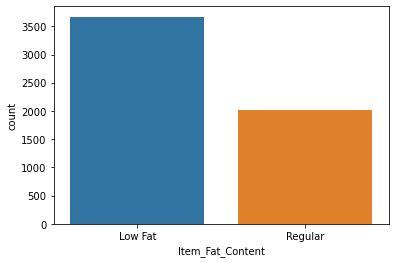

In [68]:
sns.countplot(df_test["Item_Fat_Content"])

# Data Cleaning:

In [69]:
df_test["Item_Weight"].fillna(df_test["Item_Weight"].mean(),inplace=True)

In [70]:
from sklearn.impute import SimpleImputer
emb=SimpleImputer(strategy="most_frequent")
df_test['Outlet_Size']=emb.fit_transform(df_test['Outlet_Size'].values.reshape(-1, 1))

<AxesSubplot:>

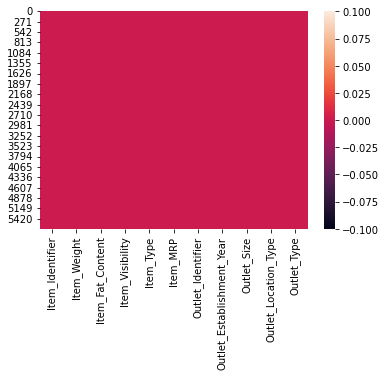

In [71]:
sns.heatmap(df_test.isnull())

# Outliers:

<AxesSubplot:>

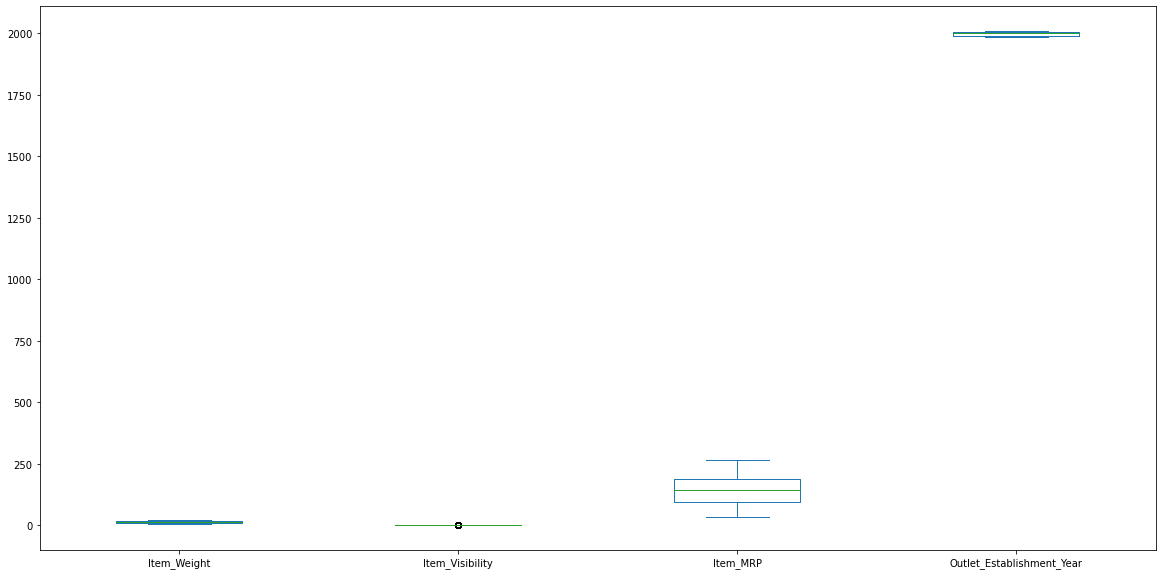

In [72]:
df_test.plot(kind='box',fontsize=10,figsize=(20,10))

# Removing the Outliers:

In [73]:
col=df_test[["Item_Visibility"]]

In [74]:
from scipy.stats import zscore
z=np.abs(zscore(col))
df_test_new=df_test[(z<3).all(axis=1)]
df_test_new

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750000,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300000,Regular,0.038428,Dairy,87.3198,OUT017,2007,Medium,Tier 2,Supermarket Type1
2,NCN55,14.600000,Low Fat,0.099575,Others,241.7538,OUT010,1998,Medium,Tier 3,Grocery Store
3,FDQ58,7.315000,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,Medium,Tier 2,Supermarket Type1
4,FDY38,12.695633,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3
...,...,...,...,...,...,...,...,...,...,...,...
5676,FDB58,10.500000,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1
5677,FDD47,7.600000,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2
5678,NCO17,10.000000,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,Medium,Tier 2,Supermarket Type1
5679,FDJ26,15.300000,Regular,0.000000,Canned,214.6218,OUT017,2007,Medium,Tier 2,Supermarket Type1


In [75]:
df_test.shape

(5681, 11)

In [76]:
df_test_new.shape

(5600, 11)

# Percentage of Data Loss:

In [77]:
Data_loss = (5681-5600)/5681*100

In [78]:
Data_loss

1.425805315965499

# Skewness:

In [79]:
df_test_new.skew()

Item_Weight                  0.140901
Item_Visibility              0.787861
Item_MRP                     0.133061
Outlet_Establishment_Year   -0.411451
dtype: float64

In [80]:
from sklearn.preprocessing import PowerTransformer
Scaler=PowerTransformer(method='yeo-johnson')

In [81]:
sk=['Item_Visibility']

In [82]:
df_new[sk] = Scaler.fit_transform(df_new[sk].values)

# Encoding:

In [83]:
from sklearn.preprocessing import LabelEncoder as LE

In [84]:
cols=["Item_Identifier", "Item_Fat_Content", "Item_Type", "Outlet_Identifier", "Outlet_Size", "Outlet_Location_Type", "Outlet_Type"]

In [85]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
df_test_new[cols]=df_test_new[cols].apply(LE.fit_transform)

# Scaling:

In [86]:
from sklearn.preprocessing import MinMaxScaler
mms=MinMaxScaler()
df_test_new=pd.DataFrame(mms.fit_transform(df_test_new),columns=df_test_new.columns)
df_test_new


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,0.715120,0.964275,0.0,0.034899,0.866667,0.323413,1.000000,0.583333,0.5,0.0,0.333333
1,0.691759,0.222983,1.0,0.177280,0.266667,0.235849,0.222222,0.916667,0.5,0.5,0.333333
2,0.911746,0.598095,0.0,0.459373,0.733333,0.894140,0.000000,0.541667,0.5,1.0,0.000000
3,0.524984,0.164335,0.0,0.070992,0.866667,0.524488,0.222222,0.916667,0.5,0.5,0.333333
4,0.767683,0.484706,1.0,0.547139,0.266667,0.862069,0.555556,0.000000,0.5,1.0,1.000000
...,...,...,...,...,...,...,...,...,...,...,...
5595,0.149903,0.353974,1.0,0.062264,0.866667,0.466011,0.888889,0.500000,1.0,0.0,0.333333
5596,0.198572,0.181304,1.0,0.659666,1.000000,0.584637,0.333333,1.000000,0.5,1.0,0.666667
5597,0.915639,0.324204,0.0,0.339212,0.533333,0.369798,0.777778,0.708333,0.5,0.5,0.333333
5598,0.335496,0.639774,1.0,0.000000,0.200000,0.778487,0.222222,0.916667,0.5,0.5,0.333333


No let's load our trained Model

In [87]:
Model=joblib.load("Big_Data_Mart_Sales.pkl")

In [88]:
prdct = Model.predict(x_test)

In [89]:
pred = pd.DataFrame(prdct)

In [90]:
pred

,0
0,3674.476962
1,4335.316752
2,188.507954
3,882.151710
4,754.704274
...,...
1681,1508.862592
1682,2224.204770
1683,257.032090
1684,1735.674020


In [91]:
prdct=Model.predict(x_train)

In [93]:
pred2=pd.DataFrame(prdct)
pred2

,0
0,2710.698172
1,4390.318490
2,3082.600736
3,1182.554012
4,6872.966846
...,...
6737,5240.611670
6738,2349.421776
6739,3003.636856
6740,2394.516410


Now,let's save the predicted values

In [94]:
pred2.to_csv('Sales.csv')